In [ ]:
pip install opencv-contrib-python

In [ ]:
!apt-get install libgl1-mesa-glx -y

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [13]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.notebook import tqdm
# Read image
total = glob.glob('./data/images/*')
for idx, img_path in enumerate(total):
    if not idx % 100:
        print(f" {idx} / {len(total)}")
    img = cv2.imread(img_path)
    try: 
        if img == None:
            continue
    except:
        sr = cv2.dnn_superres.DnnSuperResImpl_create()
        path = "./data/EDSR_x4.pb"
        
        sr.readModel(path)
        
        sr.setModel("edsr",4)
        
        result = sr.upsample(img)
        result = sr.upsample(result)

        test = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
        kernel_sharpening = np.array([[0, -1, 0],
                                    [-1, 5, -1],
                                    [0, -1, 0]])
        sharpened = cv2.filter2D(test, -1, kernel_sharpening)
        cv2.imwrite(os.path.join('./data/sr_images',img_path.split('/')[3]), cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
# Image.fromarray(np.array(sharpened))

 0 / 149570


In [12]:
import cv2
import matplotlib.pyplot as plt
import glob
# Read image
img = cv2.imread("./data/images/0694016462.01.THUMBZZZ.jpg")
img = cv2.imread(total[4])
len(img)
cv2.imread(total[4])
# plt.imshow(img[:,:,::-1])
# plt.show()

TypeError: object of type 'NoneType' has no len()

In [2]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
path = "./data/EDSR_x4.pb"
 
sr.readModel(path)
 
sr.setModel("edsr",4)
 
result = sr.upsample(img)
result = sr.upsample(result)

# Resized image
resized = cv2.resize(img,dsize=None,fx=16,fy=16)
 
plt.figure(figsize=(12,8))
# Original image
plt.subplot(1,3,1)
plt.imshow(img[:,:,::-1])
# SR upscaled
plt.subplot(1,3,2)
plt.imshow(result[:,:,::-1])
# OpenCV upscaled
plt.subplot(1,3,3)
plt.imshow(resized[:,:,::-1])
plt.show()

In [5]:
pwd

'/opt/ml/input/code'

In [11]:
glob.glob('./data/images/*')[0].split('/')[3]

'0694016462.01.THUMBZZZ.jpg'

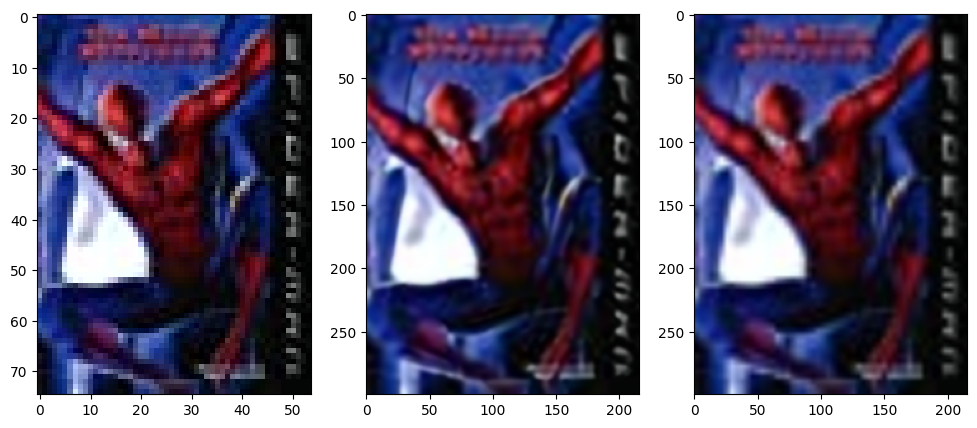

In [17]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
 
path = "./data/EDSR_x2.pb"
 
sr.readModel(path)
 
sr.setModel("edsr", 2)
 
result = sr.upsample(img)
result = sr.upsample(result)
# Resized image
resized = cv2.resize(img,dsize=None,fx=4,fy=4)
 
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(result[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.show()